## 抽样概述：
- 总体数据不可得，总体数据计算成本太高
- 抽样的目的是为了用样本去代表总体
- 抽样的误差不可避免，只是尽可能去减小误差

## 抽样要回答的问题：
- 如何抽样能代表整体?
- 选多少数量合适? -样本估计(sample size calculation). 是一个很大的话题，和选择的抽样方法、统计假设检验和实验设计都有关系

## 一般的抽样技术： (误差：分层<系统<简单随机<整群)
- 简单随机抽样 “抽签”
- 系统抽样（相对随机抽样，更容易实施）
- 分层抽样（对研究目的影响大的特征进行分组，在各层进行抽样）
  - 比例抽样
  - 最优分配抽样（不等比，根据样本数和标准差来确定抽样比例）
- 整群抽样（对研究目的影响不大的特征分组，容易开展，但误差较大）

## 采样理论：
- 大数定理和中心极限定理保证了采样的理论正确性
- 对关键系数的假设检验与区间估计，都是依赖样本量的抽样分布近似服从正态分布而展开的：
- 因为抽样分布概念的引入以及中心极限定理的应用，我们不再害怕原总体分布是否服从正态分布，只要样本量满足一定要求（通过很易达到），根据样本计算的各种统计量几乎都服从正态分布，从而均能用正态分布的性质来进行研究。

## 机器学习建模：
- 明确数据结构时，样本不均衡
- 模型性能达到瓶颈时，通过学习率曲线来判断是否需要进一步增加样本

## 抽样技术：
MC - 蒙特卡洛模拟 - Monte Carlo
- 样本间独立分布，计算机随机模拟方法


MCMC - 马尔科夫链抽样 MCMC – Markov Chain Monte Carlo
- 样本间不独立分布。通过构建一个markov chain使得该markov chain的稳定分布是我们所要采样的分布p(x)


M-H - Metropolis-Hastings采样


Gibbs抽样
- 马尔科夫链达到平稳后的一次随机游走等同于高维分布的一次采样。这就是Gibbs采样
- 从条件概率入手，最终获得目标分布f(x)
- 吉布斯抽样解决的问题和M-H方法解决的问题是一致的，都是从给定一个已知的目标分布p(x)中进行采样，并估计某个函数的期望值，区别只不过是此时，p(x)是一个多维的随机分布，p(x)的联合分布复杂，难以采样，但条件分布较容易，这样吉布斯抽样效果更好


SMOTE:
- 过采样数据合成技术 SMOTE - Synthetic Minority Over-Sampling） 市场细分：通过SMOTE来补齐某些小样本的市场细分样本量，并进行市场细分预测（解决样本不均衡问题）


协方差矩阵:
- 典型车辆提取。基于duty cycle通过协方差来得到特征向量和特征值，计算与中心点的距离，进而提取有代表性的典型车辆

# （MC）Monte Carlo - 蒙特卡洛采样
- 蒙特卡洛法也称统计实验法，是把概率现象作为研究对象的数值模拟方法，按抽样调查法求取统计值来推定未知特性量的计算方法


- MC将所求解问题可以转化为某种随机分布的特征数，比如随机事件出现的概率，或者随机变量的期望值。通过随机抽样的方法，以随机事件出现的频率估计其概率，或者以抽样的数字特征估算随机变量的数字特征，并将其作为问题的解。这种方法多用于求解复杂的多维积分问题


- 蒙特卡罗方法不仅仅用于估算不规则区域的面积。通过生成大量的随机数，它们可以用来模拟非常复杂的过程。在实践中，它们可以用来预测天气，或估计选举结果。


- MC构造过程：
    - 构造概率模型或描述概率过程
    - 实现从已知概率分布抽样（生成随机数。随机抽样，采样越多，越近似最优解），得到抽样结果计算统计量
    - 建立各种估计量，用概率拟合估计量
    
    
- 蒙特卡洛法使用场景：
    - 当所求解的问题是某种随机事件出现的概率，或者是某个随机变量的期望值时，通过某种"实验"(或者说"计算机实验"的方法)，以事件出现的频率作为随机事件的概率(落在圆内的概率等)，或者得到这个随机变量的某些数字特征(积分值，净利润等)，并将其作为问题的解。
    
    
- MC的使用方法：
    - 比如说我要求某个参量，直接求解遇到了困难，那我就构造一个合适的概率模型，对这个模型进行大量的采样和统计实验，使它的某些统计参量正好是待求问题的解，那么，只需要把这个参量的值统计出来，那么问题的解就得到了估计值。

实例1：MC计算圆周率pi

In [0]:
# M = input('请输入一个较大的整数（随机抽样次数）')  #输入的数一般要很大才能保证所求结果不会与圆周率产生较大误差

M = 10000
print('随机采样次数:',M)

N=0                              #累计落在园内的随机点的个数，初始值为零

import math
import random

for i in range(int(M)):
    x = random.random()          #利用random（）产生随机数或者是伪随机数
    y = random.random()
    if math.sqrt(x**2+y**2)<1:   #判断产生的随机点是否落在单位圆内
        N = N+1                  #对落在圆内的点进行累加

pi=4*N/int(M)

print(pi)

随机采样次数: 10000
3.1132


实例2：计算函数y=x**2在[0,1]区间的定积分

In [0]:
# n=int(input('请输入一个较大的整数'))   #要确保输入的整数足够大

n = 10000
print('随机采样次数:',n)

m=0                                  

import random

for i in range(n):
    x = random.random()              
    y = random.random()
    if x**2>y:                       #表示该点位于曲线y=x^2的下面
        m=m+1

R=m/n

print(R)

随机采样次数: 10000
0.327


# （MCMC）马尔科夫链抽样 MCMC – Markov Chain Monte Carlo
- 蒙特卡罗法(Monte Carlo method)，也称为统计模拟方法(statistical simulation method)，是通过从概率模型的随机抽样进行近似数值计算的方法。
- 马尔可夫链蒙特卡罗法(Markov Chain Monte Carlo，MCMC)，则是以马尔可夫链(Markovchain)为概率模型的蒙特卡罗法。马尔可夫链蒙特卡罗法构建一个马尔可夫链，使其平稳分布就是要进行抽样的分布，首先基于该马尔可夫链进行随机游走，产生样本的序列，之后使用该平稳分布的样本进行近似的数值计算。

二维Gibbs采样

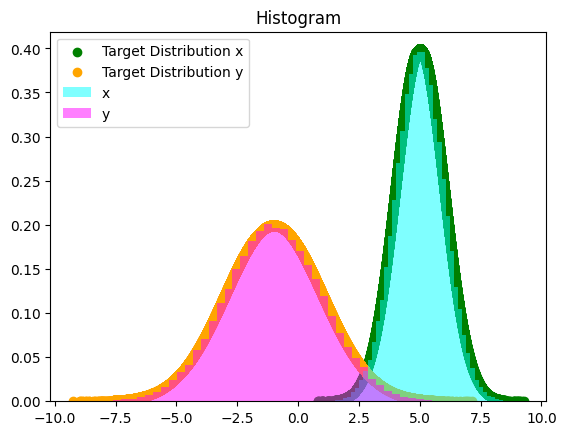

In [0]:
import random
import math
from scipy.stats import beta
from scipy.stats import norm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

samplesource = multivariate_normal(mean=[5,-1], cov=[[1,0.5],[0.5,2]])

def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt(1 - rho ** 2) * s2))

def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), math.sqrt(1 - rho ** 2) * s1))

N = 5000
K = 20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2

rho = 0.5
y = m2

for i in range(N):
    for j in range(K):
        x = p_xgiveny(y, m1, m2, s1, s2)   #y给定得到x的采样
        y = p_ygivenx(x, m1, m2, s1, s2)   #x给定得到y的采样
        z = samplesource.pdf([x,y])
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)

num_bins = 50
plt.scatter(x_res, norm.pdf(x_res, loc=5, scale=1),label='Target Distribution x', c= 'green')
plt.scatter(y_res, norm.pdf(y_res, loc=-1, scale=2),label='Target Distribution y', c= 'orange')
plt.hist(x_res, num_bins, density=1, facecolor='Cyan', alpha=0.5,label='x')
plt.hist(y_res, num_bins, density=1, facecolor='magenta', alpha=0.5,label='y')
plt.title('Histogram')
plt.legend()
plt.show()

In [0]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(x_res, y_res, z_res,marker='o',c= '#00CED1')
plt.show()

<Figure size 640x480 with 0 Axes>

# SMOTE
- SMOTE = Synthetic Minority Over-Sampling
- 过采样数据合成技术

In [0]:
import random
from sklearn.neighbors import NearestNeighbors
import numpy as np
class Smote:
    def __init__(self,samples,N=10,k=5):
        self.n_samples,self.n_attrs=samples.shape
        self.N=N
        self.k=k
        self.samples=samples
        self.newindex=0
       # self.synthetic=np.zeros((self.n_samples*N,self.n_attrs))

    def over_sampling(self):
        N=int(self.N/100)
        self.synthetic = np.zeros((self.n_samples * N, self.n_attrs))
        neighbors=NearestNeighbors(n_neighbors=self.k).fit(self.samples)
        print('neighbors',neighbors)
        for i in range(len(self.samples)):
            nnarray=neighbors.kneighbors(self.samples[i].reshape(1,-1),return_distance=False)[0]
            #print nnarray
            self._populate(N,i,nnarray)
        return self.synthetic


    # for each minority class samples,choose N of the k nearest neighbors and generate N synthetic samples.
    def _populate(self,N,i,nnarray):
        for j in range(N):
            nn=random.randint(0,self.k-1)
            dif=self.samples[nnarray[nn]]-self.samples[i]
            gap=random.random()
            self.synthetic[self.newindex]=self.samples[i]+gap*dif
            self.newindex+=1

            
a=np.array([[1,2,3],[4,5,6],[2,3,1],[2,1,2],[2,3,4],[2,3,4]])

s=Smote(a,N=200)
print(s.over_sampling())

neighbors NearestNeighbors()
[[1.07238484 2.07238484 3.07238484]
 [1.32998021 1.67001979 2.67001979]
 [3.60454935 4.60454935 5.60454935]
 [3.54608478 4.54608478 5.54608478]
 [2.         3.         1.        ]
 [2.         3.         2.40692974]
 [1.65935885 1.34064115 2.34064115]
 [1.99467876 1.00532124 2.00532124]
 [2.         3.         2.20831387]
 [2.         3.         3.18464718]
 [2.         2.43695528 3.43695528]
 [2.         3.         4.        ]]
